In [43]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

#From SCI-KIT
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GroupKFold, cross_val_score

import eli5

# Konfiguracja
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [45]:
#!pip install eli5

Wczytanie danych

In [46]:
df = pd.read_csv('titanic_clean_limited.csv')
df.shape

(1310, 13)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass            1309 non-null   float64
 1   survived          1309 non-null   float64
 2   name              1309 non-null   object 
 3   sex               1309 non-null   object 
 4   age               1310 non-null   float64
 5   sibsp             1309 non-null   float64
 6   parch             1309 non-null   float64
 7   ticket            1309 non-null   object 
 8   fare              1308 non-null   float64
 9   cabin             295 non-null    object 
 10  embarked          1310 non-null   object 
 11  home.dest         745 non-null    object 
 12  has_cabin_number  1310 non-null   int64  
dtypes: float64(6), int64(1), object(6)
memory usage: 133.2+ KB


In [48]:
df = df.drop(columns = ['cabin', 'home.dest'] ,axis=1)

In [49]:
#df[df.index == 1309]
try:
    df = df.drop(index=1309)
    df
except:
    df

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass            1309 non-null   float64
 1   survived          1309 non-null   float64
 2   name              1309 non-null   object 
 3   sex               1309 non-null   object 
 4   age               1309 non-null   float64
 5   sibsp             1309 non-null   float64
 6   parch             1309 non-null   float64
 7   ticket            1309 non-null   object 
 8   fare              1308 non-null   float64
 9   embarked          1309 non-null   object 
 10  has_cabin_number  1309 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 122.7+ KB


In [51]:
df[df['fare'].isnull()]
print(df.shape)
try:
    df = df.drop(index=1225)
except:
    pass
print(df.shape, '\n')

# Typy danych z float na int
df['pclass'] = df['pclass'].astype('int8')
print("pclass zmieniony na int8")
df['survived'] = df['survived'].astype('int8')
print("survived zmieniony na int8")
df['sibsp'] = df['sibsp'].astype('int8')
print("sibsp zmieniony na int8")
df['parch'] = df['parch'].astype('int8')
print("parch zmieniony na int8")

(1309, 11)
(1308, 11) 

pclass zmieniony na int8
survived zmieniony na int8
sibsp zmieniony na int8
parch zmieniony na int8


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass            1308 non-null   int8   
 1   survived          1308 non-null   int8   
 2   name              1308 non-null   object 
 3   sex               1308 non-null   object 
 4   age               1308 non-null   float64
 5   sibsp             1308 non-null   int8   
 6   parch             1308 non-null   int8   
 7   ticket            1308 non-null   object 
 8   fare              1308 non-null   float64
 9   embarked          1308 non-null   object 
 10  has_cabin_number  1308 non-null   int64  
dtypes: float64(2), int64(1), int8(4), object(4)
memory usage: 86.9+ KB


Wyczyszczony dataframe

In [53]:
# Zamieniam wartości kategoryczne na numeryczne
df['sex_num'] = df['sex'].factorize()[0]
df['embarked_num'] = df['embarked'].factorize()[0]

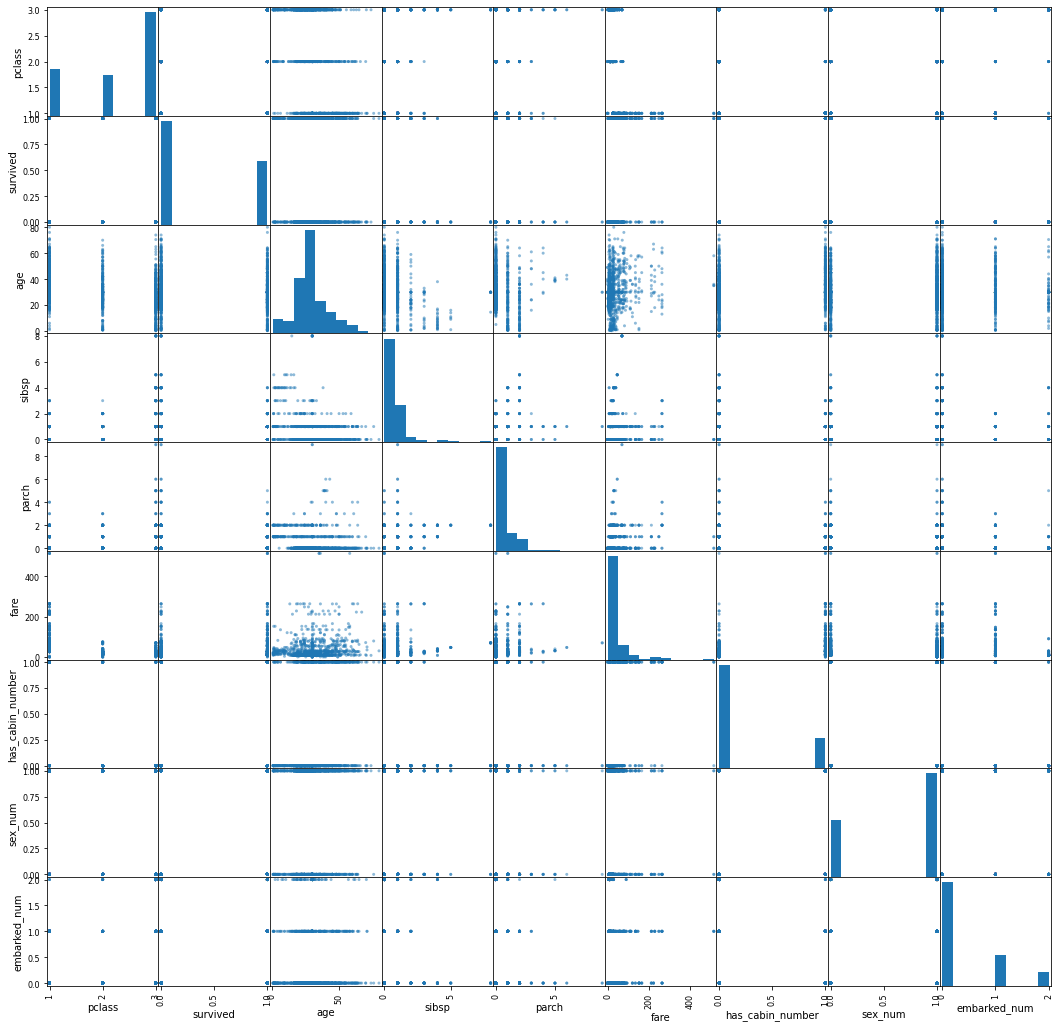

In [54]:
pd.plotting.scatter_matrix(df, figsize=(18,18));

In [55]:
cols = [ i for i in df.columns if i not in ['ticket', 'name'] ]
cols

['pclass',
 'survived',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'has_cabin_number',
 'sex_num',
 'embarked_num']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


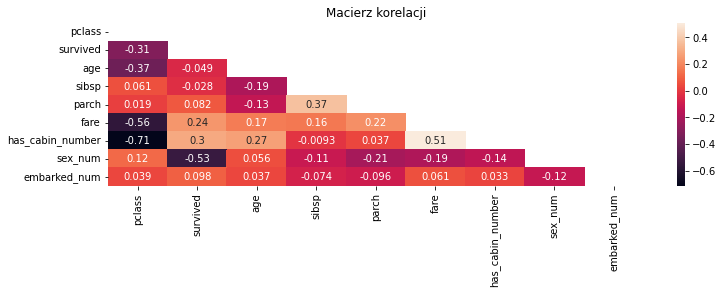

In [56]:
plt.figure(figsize=(12,3))

maska = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask = maska, annot=True);
heatmap.set_title("Macierz korelacji");

In [57]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,has_cabin_number,sex_num,embarked_num
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,S,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,S,1,1,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,S,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,S,1,1,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,S,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,C,0,0,1
1305,3,0,"Zabour, Miss. Thamine",female,29.881135,1,0,2665,14.4542,C,0,0,1
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,C,0,1,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,C,0,1,1


In [58]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number,sex_num,embarked_num
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,2.294343,0.382263,29.857726,0.499235,0.385321,33.295479,0.225535,0.643731,0.394495
std,0.837929,0.486126,12.860247,1.041965,0.865826,51.758668,0.418094,0.479079,0.653658
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,2.000000


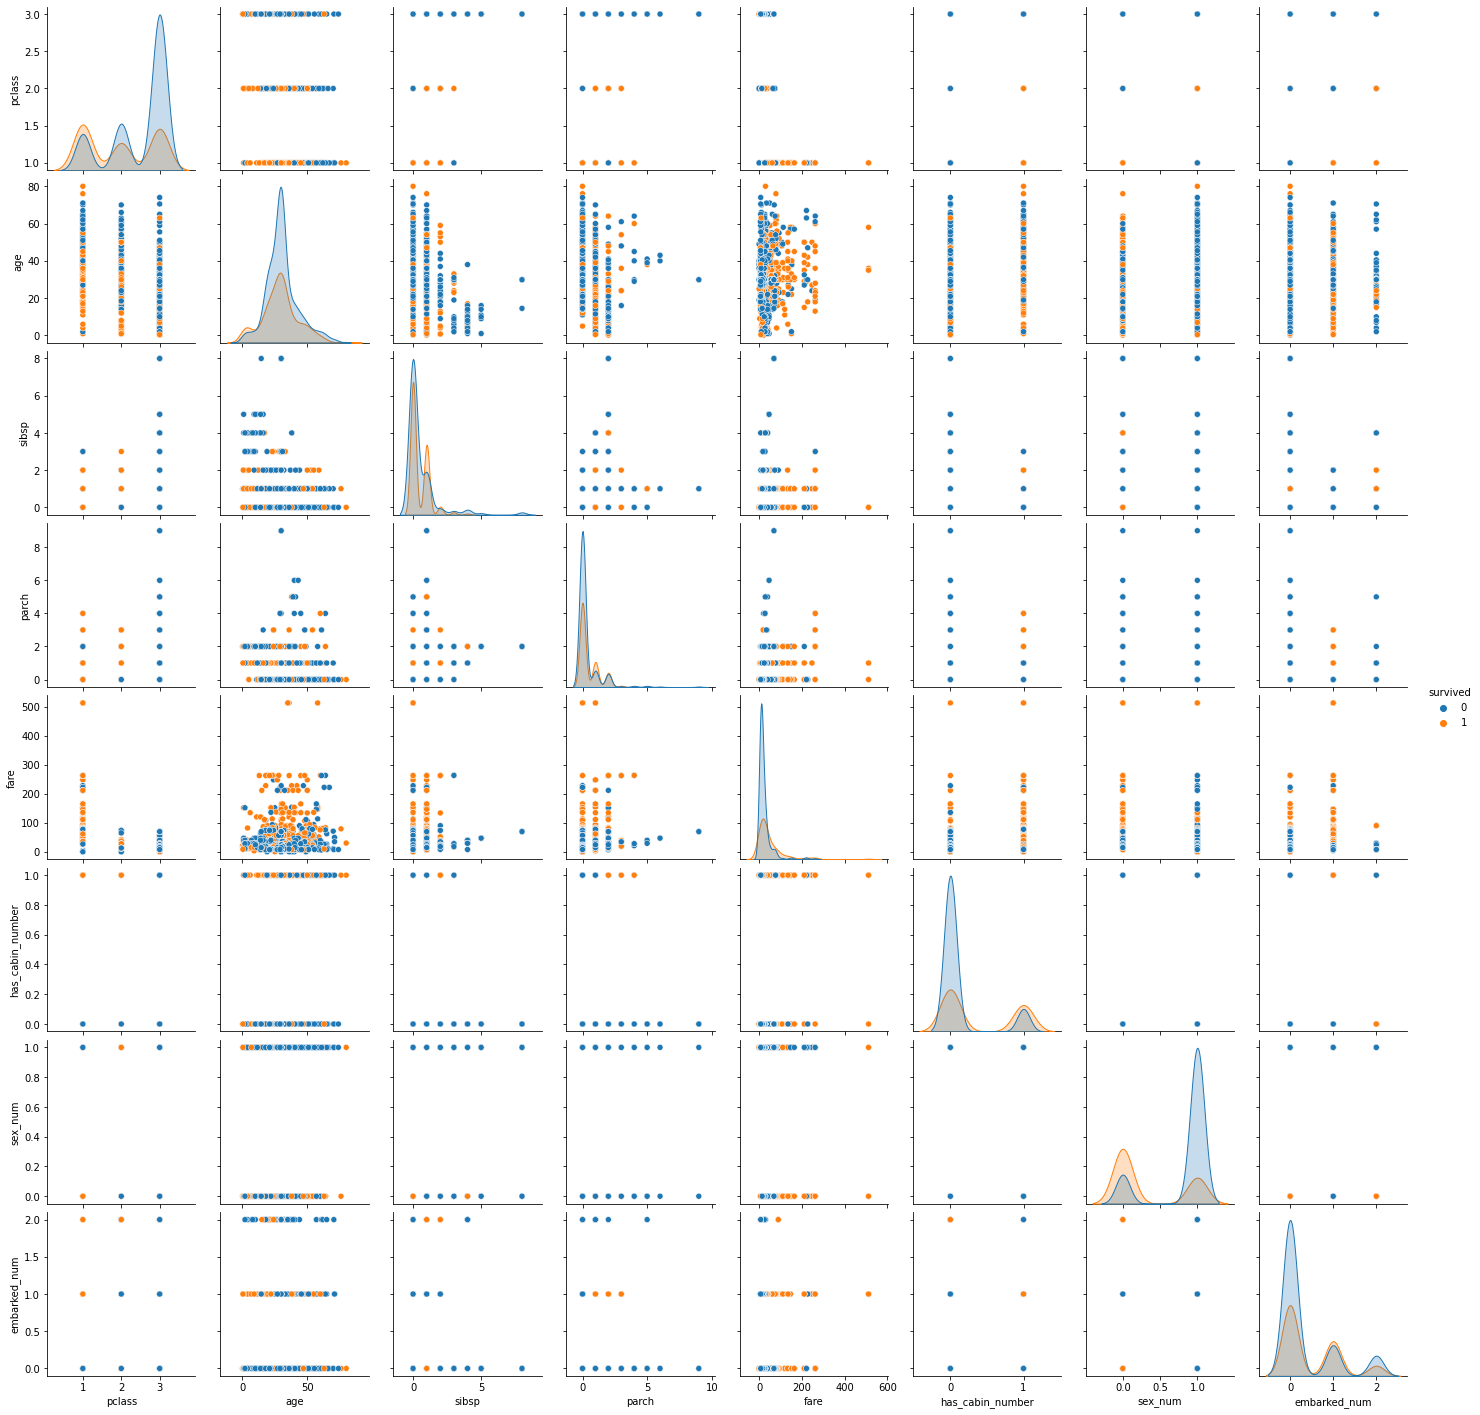

In [59]:
sns.pairplot(df, hue = "survived", kind = "scatter");

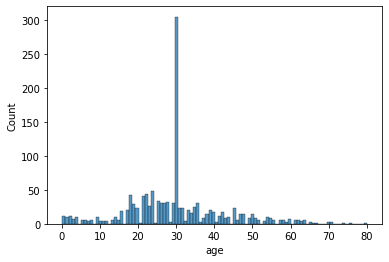

In [60]:
sns.histplot(df['age'], bins=100)

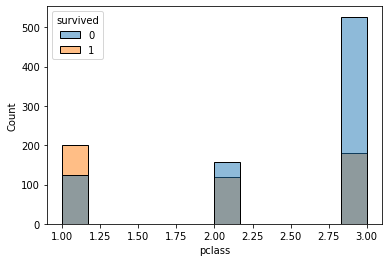

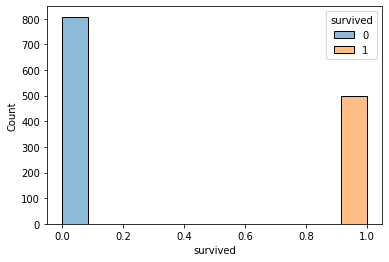

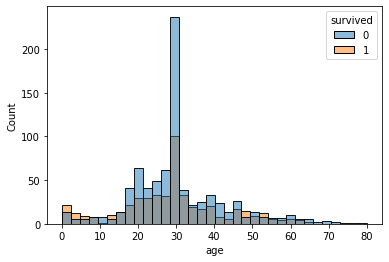

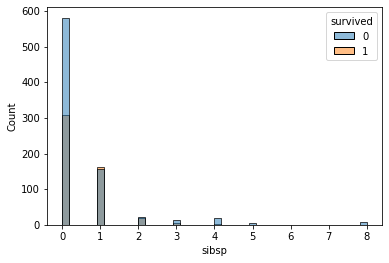

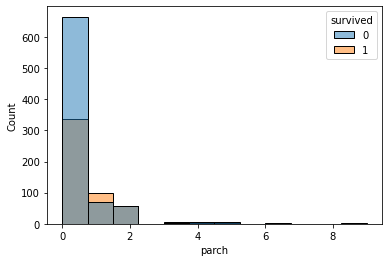

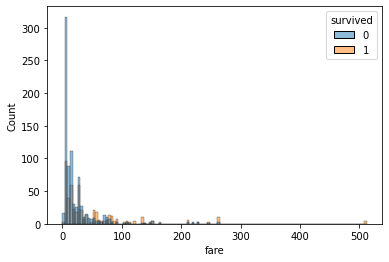

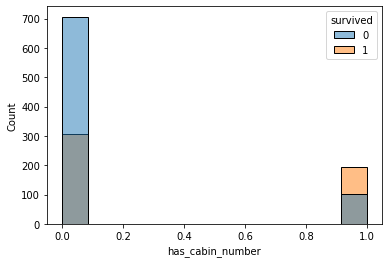

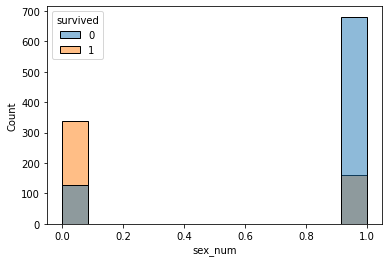

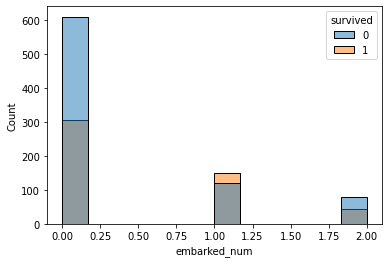

In [61]:
cols = [ i for i in df.columns if i not in ['ticket', 'name',  'embarked', 'sex'] ]

for i in cols:
    sns.histplot(data=df, x = i, hue = 'survived')
    plt.show()

In [62]:
df['survived'].value_counts()

0    808
1    500
Name: survived, dtype: int64

In [63]:
df2 = df[ df['survived'] > 0 ]
df2.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked', 'has_cabin_number', 'sex_num', 'embarked_num'], dtype='object')

## Obliczam ile procent kobiet przeżyło katastrofę.

In [64]:
#print(df2['sex'].value_counts())
osoby = df2['sex'].value_counts()[0] + df2['sex'].value_counts()[1]
kobiety = df2['sex'].value_counts()[0] / osoby
mężczyźni = df2['sex'].value_counts()[1] / osoby

print('W rejsie uczestniczyło: ' + str(osoby) + ' osób.\n')
print('Przyżyło ' + str(round(kobiety * 100, 2)) + ' % kobiet')
print('Przyżyło ' + str(round(mężczyźni * 100,2)) + ' % mężczyzn')

W rejsie uczestniczyło: 500 osób.

Przyżyło 67.8 % kobiet
Przyżyło 32.2 % mężczyzn


In [65]:
df3 = df2[ df2['sex']=='female']
print(df3.shape)
df3.describe()

(339, 13)


,pclass,survived,age,sibsp,parch,fare,has_cabin_number,sex_num,embarked_num
count,339.000000,339.0,339.000000,339.000000,339.000000,339.000000,339.000000,339.0,339.000000
mean,1.902655,1.0,29.824474,0.510324,0.536873,55.142048,0.392330,0.0,0.519174
std,0.845782,0.0,13.704020,0.706508,0.832564,70.149828,0.488991,0.0,0.685059
min,1.000000,1.0,0.166700,0.000000,0.000000,6.950000,0.000000,0.0,0.000000
25%,1.000000,1.0,22.000000,0.000000,0.000000,13.000000,0.000000,0.0,0.000000
50%,2.000000,1.0,29.881135,0.000000,0.000000,26.000000,0.000000,0.0,0.000000
75%,3.000000,1.0,36.000000,1.000000,1.000000,75.770850,1.000000,0.0,1.000000
max,3.000000,1.0,76.000000,4.000000,5.000000,512.329200,1.000000,0.0,2.000000


## Analiza statystyczna mężczyzn którzy przeżyli

In [66]:
df3 = df2[ df2['sex']=='male']
print(df3.shape)
df3.describe()

(161, 13)


,pclass,survived,age,sibsp,parch,fare,has_cabin_number,sex_num,embarked_num
count,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.000000,161.0,161.000000
mean,2.086957,1.0,27.446643,0.360248,0.347826,37.189053,0.372671,1.0,0.385093
std,0.917819,0.0,14.274430,0.628021,0.625109,63.891300,0.485024,0.0,0.570768
min,1.000000,1.0,0.416700,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,1.000000,1.0,21.000000,0.000000,0.000000,8.050000,0.000000,1.0,0.000000
50%,2.000000,1.0,29.881135,0.000000,0.000000,20.575000,0.000000,1.0,0.000000
75%,3.000000,1.0,32.000000,1.000000,1.000000,35.500000,1.000000,1.0,1.000000
max,3.000000,1.0,80.000000,4.000000,2.000000,512.329200,1.000000,1.0,2.000000


Ile przeżyło osób w zależności od klasy...

In [67]:
df2['pclass'].value_counts()

1    200
3    181
2    119
Name: pclass, dtype: int64

Po analizie EDA okazuje się, że do przeżycia ważne były cechy.
1) Płeć - Kobieta
2) klasa - 1
3) Wiek (około 30 lat)

Najlepiej byłoby być młodą kobietą z biltem z pierwszej klasie.

In [68]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'embarked', 'has_cabin_number', 'sex_num', 'embarked_num'], dtype='object')

In [69]:
#Wybieram cechy dla modelu
features = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked_num', 'has_cabin_number', 'sex_num']
df[features]

,pclass,age,sibsp,parch,fare,embarked_num,has_cabin_number,sex_num
0,1,29.000000,0,0,211.3375,0,1,0
1,1,0.916700,1,2,151.5500,0,1,1
2,1,2.000000,1,2,151.5500,0,1,0
3,1,30.000000,1,2,151.5500,0,1,1
4,1,25.000000,1,2,151.5500,0,1,0
...,...,...,...,...,...,...,...,...
1304,3,14.500000,1,0,14.4542,1,0,0
1305,3,29.881135,1,0,14.4542,1,0,0
1306,3,26.500000,0,0,7.2250,1,0,1
1307,3,27.000000,0,0,7.2250,1,0,1


In [70]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['survived'], test_size=0.33, random_state=2022)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((876, 8), (432, 8), (876,), (432,))

Model

In [72]:
#DecisionTreeClassifier
m_dcc = DecisionTreeClassifier(max_depth=5, random_state=2022)
m_dcc

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [73]:
m_dcc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=2022)

In [74]:
y_pred = m_dcc.predict(X_test)

In [75]:
accuracy_score(y_test, y_pred)

0.7638888888888888

In [76]:
eli5.show_weights(m_dcc, feature_names=features)

Weight,Feature
0.6148,sex_num
0.1115,pclass
0.0977,age
0.0850,fare
0.0512,sibsp
0.0357,has_cabin_number
0.0040,embarked_num
0,parch


In [77]:
#dopasowanie najlepszych parametrów do random forest
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':[5,10,15,None],
              'n_estimators':[50,100,150,200]  
}
m_rf = RandomForestClassifier(random_state=42)
gs_cv = GridSearchCV(estimator=m_rf,
                   param_grid=parameters, cv=10)
gs_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'n_estimators': [50, 100, 150, 200]})

In [78]:
gs_cv.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}

Waga cech według Random Forest

In [79]:
# Random forests //from sklearn.ensemble import RandomForestClassifier
m_rf = RandomForestClassifier(max_depth = 7 ,n_estimators = 120,)
m_rf.fit(X_train, y_train)
y_pred2 = m_rf.predict(X_test)
print(accuracy_score(y_test, y_pred2))
eli5.show_weights(m_rf, feature_names=features)

0.7939814814814815


Weight,Feature
0.4129 ± 0.2541,sex_num
0.1725 ± 0.1818,fare
0.1276 ± 0.0723,age
0.0880 ± 0.1124,pclass
0.0638 ± 0.1283,has_cabin_number
0.0541 ± 0.0756,parch
0.0520 ± 0.0563,sibsp
0.0289 ± 0.0374,embarked_num


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


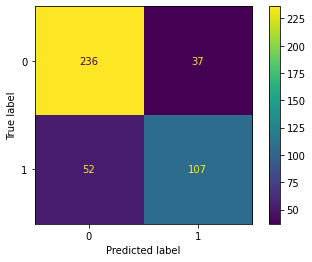

In [80]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(m_rf,
                      X_test,
                      y_test)

Podsumowując najistotniejsze czynniki które wpływały na prawdopodobieństwo przeżycia to: 


*   Płeć
*   Cena biletu
*   Wiek